In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(data, c='c', label='', bins=100):
    plt.subplot(1, 1, 1)
    plt.hist(data,bins=bins, label='')
    plt.xticks(np.arange(0,1,0.05))
    plt.legend()
    plt.show()

stage1_entropy = '/home/ljh/GEC/gector/data/stage1.entropy.npz'

In [2]:
def convert_entropy(entro):
    SCALE_CONSTANT = 9
    CONSTANT= np.exp(-SCALE_CONSTANT)
    converted = - np.log(entro + CONSTANT) / SCALE_CONSTANT
    converted = np.where(converted > CONSTANT, converted, CONSTANT)
    sentence_entropy = np.mean(converted)
    return sentence_entropy
def get_quality(data, i):
    if 'lengths' in data:
        output = data['data'][i]
        length = data['lengths'][i]
        return output[:length]
    else:
        return data['arr_' + str(i)]

entropy_dict = dict(np.load(stage1_entropy))

In [3]:
sent_entropy = []
for i in range(100000):
    data = get_quality(entropy_dict, i)
    data = data[:50]
    data = convert_entropy(data)
    sent_entropy.append(data)

In [4]:
print(len(sent_entropy))
sample_data = sent_entropy[:100000]

100000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


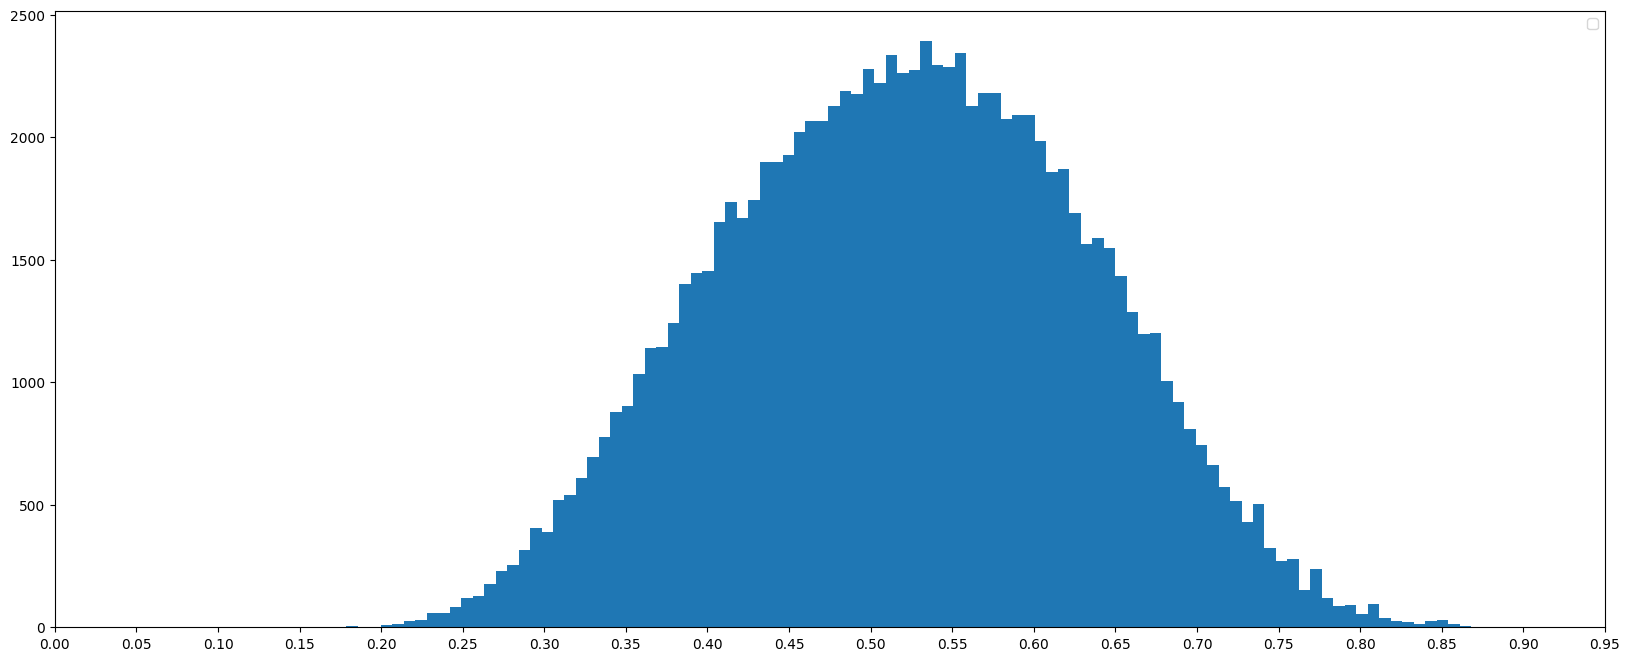

In [5]:
plt.figure(figsize=(20, 8))
plot_data(sample_data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


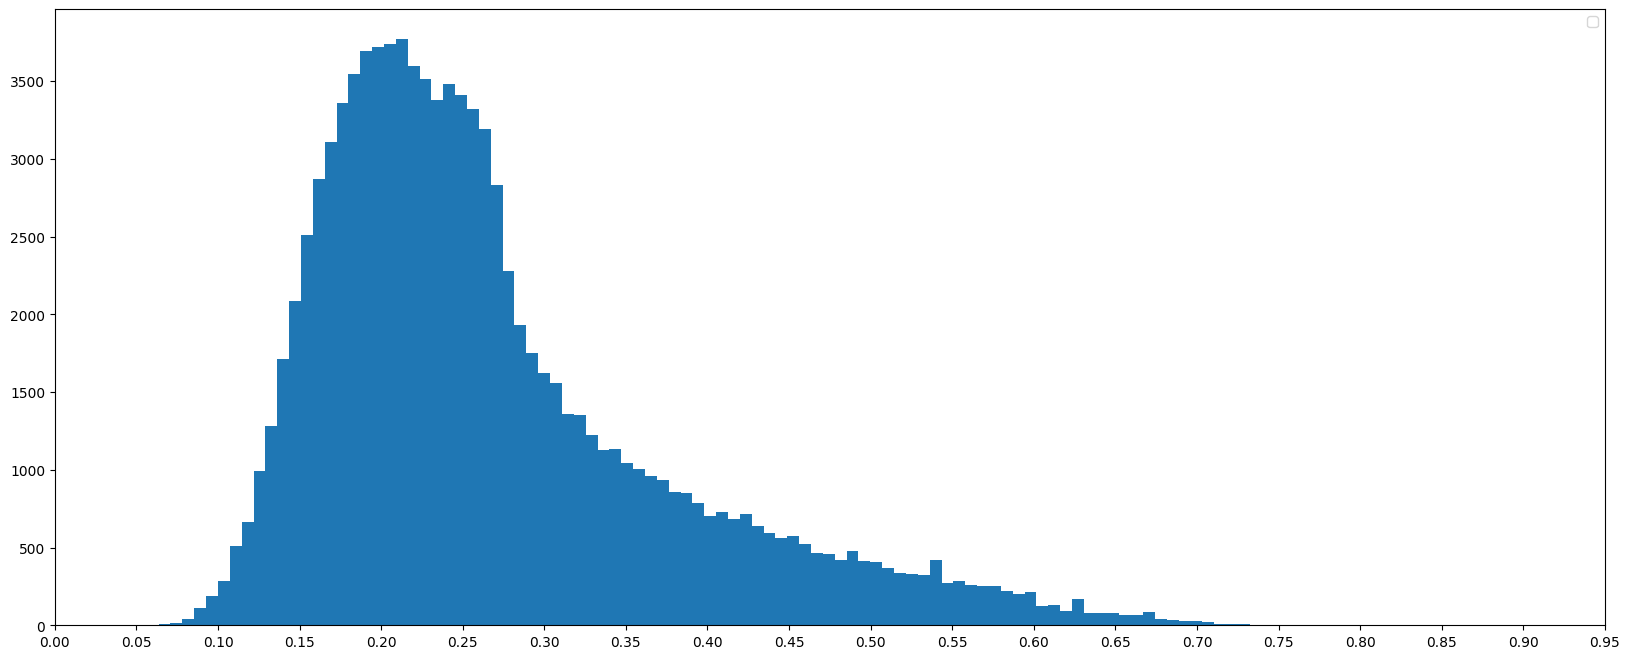

In [6]:
def convert_entropy(entro):
    SCALE_CONSTANT = 9
    CONSTANT= np.exp(-SCALE_CONSTANT)
    converted = - np.log(entro + CONSTANT) / SCALE_CONSTANT
    converted = np.where(converted > CONSTANT, converted, CONSTANT)
    sentence_entropy = np.min(converted)
    return sentence_entropy
def get_quality(data, i):
    if 'lengths' in data:
        output = data['data'][i]
        length = data['lengths'][i]
        return output[:length]
    else:
        return data['arr_' + str(i)]

entropy_dict = dict(np.load(stage1_entropy))
sample_data = []
for i in range(100000):
    data = get_quality(entropy_dict, i)
    data = data[:50]
    data = convert_entropy(data)
    sample_data.append(data)

plt.figure(figsize=(20, 8))
plot_data(sample_data)

In [7]:
print(entropy_dict['data'][entropy_dict['data'] > 0].min())
print(entropy_dict['data'][entropy_dict['data'] > 0].max())

3.2301481e-09
0.6204825


In [8]:
for i in range(10):
    data = get_quality(entropy_dict, i)
    print(data[:50])

[0.00295432 0.00324143 0.00222686 0.01133491 0.00977052 0.04951926
 0.22120242 0.21000881 0.29932225 0.17829466 0.03340912 0.00229312]
[0.00011184 0.00069829 0.00178744 0.00099155 0.00074179 0.00385576
 0.03410558 0.00713856 0.00163878 0.00063825 0.00111745 0.04892367
 0.0043925  0.08628728 0.04358376]
[0.01618436 0.10402726 0.01648683 0.1292628  0.1506616  0.35383636
 0.13905223 0.06301522 0.09752162 0.1691319  0.07416093 0.00555265]
[0.00041452 0.00037838 0.00282432 0.0008715  0.00101464 0.00182658
 0.0157775  0.00475805 0.0020836 ]
[0.00148938 0.0039349  0.08213533 0.00618505 0.04550632 0.00456086
 0.00358153 0.00242714]
[0.00017156 0.00015547 0.00035061 0.00354409 0.00033093 0.00187652
 0.00384241 0.08441885 0.09427928 0.00051086]
[0.00176095 0.09322868 0.00204947 0.0020478  0.04936536 0.03338939
 0.01108026 0.06655017 0.00343764 0.00226102 0.00096133 0.00263845
 0.00336026 0.00403231 0.02598029 0.06169561 0.04871968 0.09524408
 0.08494924 0.01733874 0.00546343 0.00314401 0.0138540

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


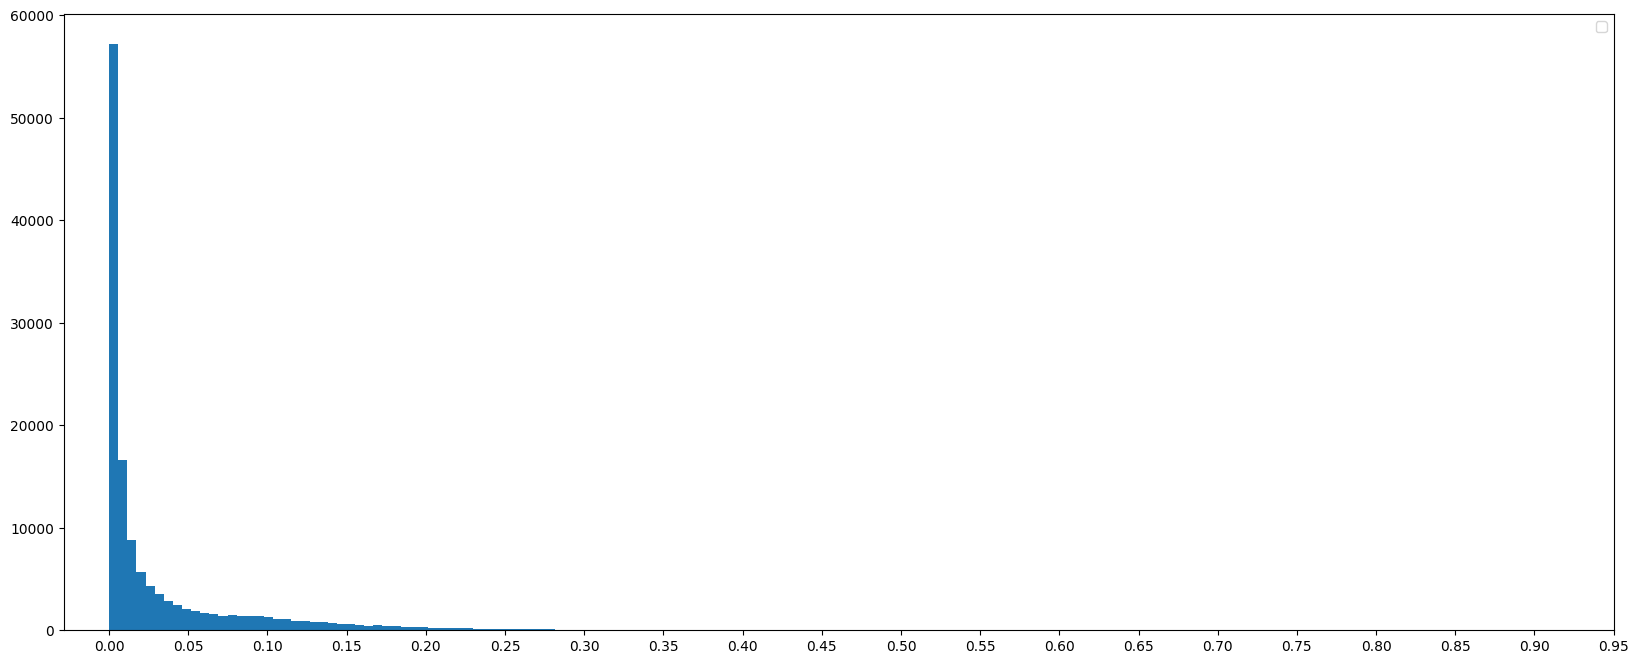

0.03279886


In [16]:
entropy_list = []
for i in range(10000):
    data = get_quality(entropy_dict, i)
    entropy_list.extend(data)
def plot_entropy(data, c='c', label='', bins=100):
    plt.subplot(1, 1, 1)
    plt.hist(data,bins=bins, label='')
    plt.xticks(np.arange(0,1,0.05))
    plt.legend()
    plt.show()
plt.figure(figsize=(20, 8))
plot_entropy(entropy_list)
print(np.mean(entropy_list))

In [17]:
for i in range(10):
    print(i, np.percentile(entropy_list, i))

0 4.286168405087665e-06
1 0.0001559819863177836
2 0.00024422816291917113
3 0.00032252308446913954
4 0.0003939279483165592
5 0.00046404762833844875
6 0.0005357876012567431
7 0.0006063822383293883
8 0.0006763245235197246
9 0.0007490918191615492


: 

# correct

In [5]:
stage1_correct = '/home/ljh/GEC/gector/data/stage1.correct_probs.npz'
correct_dict = dict(np.load(stage1_correct))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


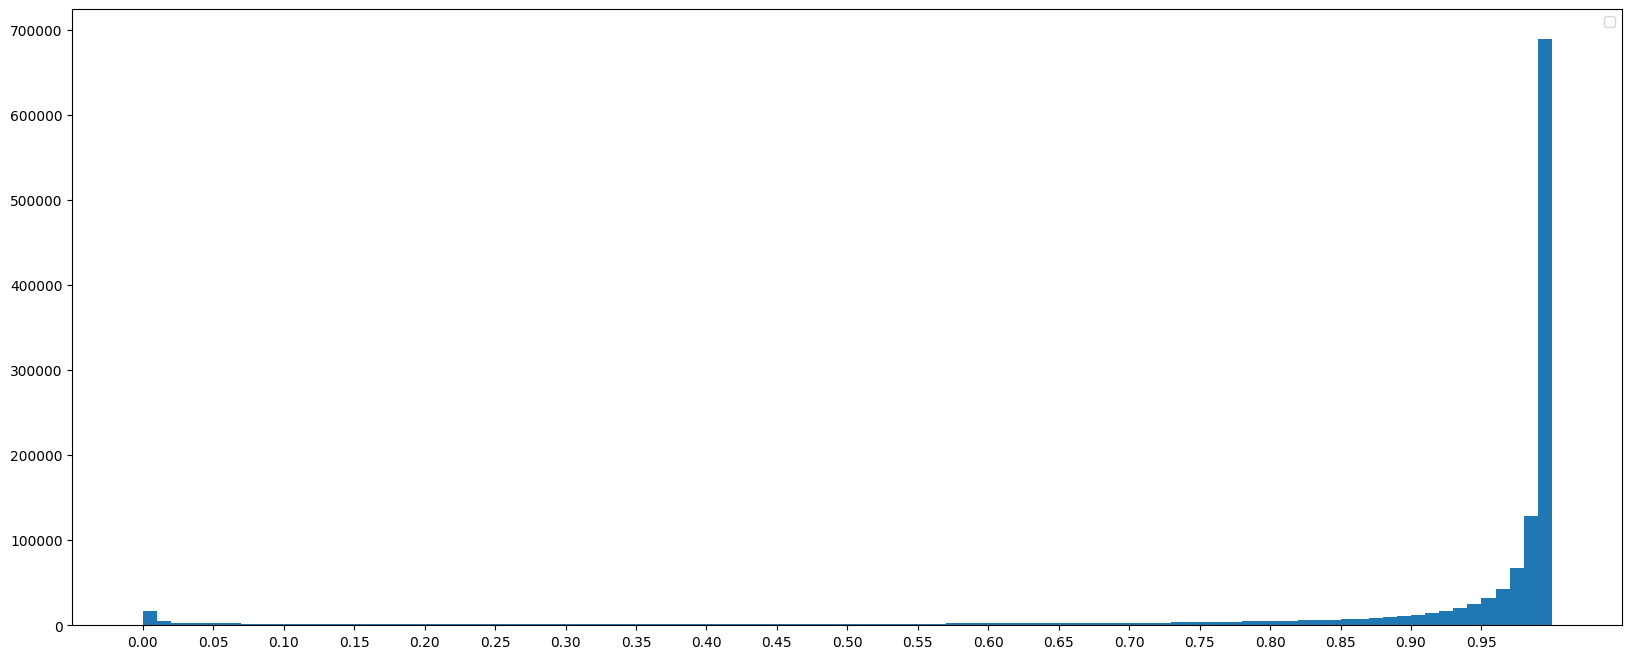

In [6]:
def get_quality(data, i):
    if 'lengths' in data:
        output = data['data'][i]
        length = data['lengths'][i]
        return output[:length]
    else:
        return data['arr_' + str(i)]
correct = []
for i in range(100000):
    data = get_quality(correct_dict, i)
    correct.extend(data)
plt.figure(figsize=(20, 8))
plot_data(correct)